### MODELOS DE CLASIFICACION XGBOOST, CATBOOST Y RANDOM FOREST


### **1.Instalación de Librerias**



In [ ]:
#Código para cargar achivos
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#Librerías para manipulación de datos
import numpy as np
import pandas as pd

#Librerías para visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#Librerías para tratamiento, modelado y evaluación de datos
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
#Carga de base de datos
df = pd.read_csv('Clasificacion_picos_intensidad.csv',sep=",")

In [ ]:
#Visualizar registros de mi dataset
# picos_intens=0: no se sobrecarga y picos_intens=1: maquina se ha sobrecargado
# y va a afectar la producción
df.head()

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,316,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,317,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,318,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,319,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,320,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [ ]:
#Dimensionalidad del dataset
df.shape

(14375, 9)

In [ ]:
#Eliminar columna
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [ ]:
#Cambiar tipo de datos y sobreescribir
#En este caso se le coloca dos decimales a todos
df=df.astype(float).round(2)  #int

In [ ]:
df.head()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [ ]:
#Revision descriptiva
df.describe()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
count,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000
mean,6015.786763,3363.326903,8.839000,75.487416,11667.772478,64.747783,2.186024,0.104835
std,134.324754,537.442267,0.536565,7.061388,1569.146488,13.439820,0.226976,0.306351
min,5566.500000,0.050000,0.010000,0.000000,-23.010000,7.640000,-0.820000,0.000000
25%,5946.590000,3092.900000,8.720000,74.330000,10713.705000,55.095000,2.020000,0.000000
50%,6032.640000,3357.810000,8.870000,75.980000,11353.280000,66.530000,2.160000,0.000000
75%,6104.040000,3662.140000,8.940000,77.850000,12634.270000,76.280000,2.370000,0.000000
max,6483.500000,4547.040000,9.340000,84.830000,15750.450000,91.370000,2.750000,1.000000


In [ ]:
#Distribución de la variable Target
df['picos_intens'].value_counts()

0.0    12868
1.0     1507
Name: picos_intens, dtype: int64

In [ ]:
#Distribución de la variable Target en %
round(df['picos_intens'].value_counts() / len(df) * 100, 2)

0.0    89.52
1.0    10.48
Name: picos_intens, dtype: float64

In [ ]:
#Guardaos en otra variable el DF para trabajar con otro
#y no afectar el original
data=df

### **3. Exploracion de datos**

In [ ]:
# identificando valores Nulos
data.isnull().sum().sort_values(ascending=False)

Presion         0
Tonelaje        0
Velocidad       0
%Solidos        0
Potencia        0
F80             0
Brazo           0
picos_intens    0
dtype: int64

In [ ]:
data.columns

Index(['Presion', 'Tonelaje', 'Velocidad', '%Solidos', 'Potencia', 'F80',
       'Brazo', 'picos_intens'],
      dtype='object')

In [ ]:
round(1507 / 14375,4)

0.1048

In [ ]:
#Distribución de la variable Target en %
round(data.picos_intens.value_counts(normalize=True) * 100, 4)

0.0    89.5165
1.0    10.4835
Name: picos_intens, dtype: float64

Class 0 Intensidad_Normal: 12868
Class 1 Intensidad_Pico: 1507
Proporción: 8.54 : 1


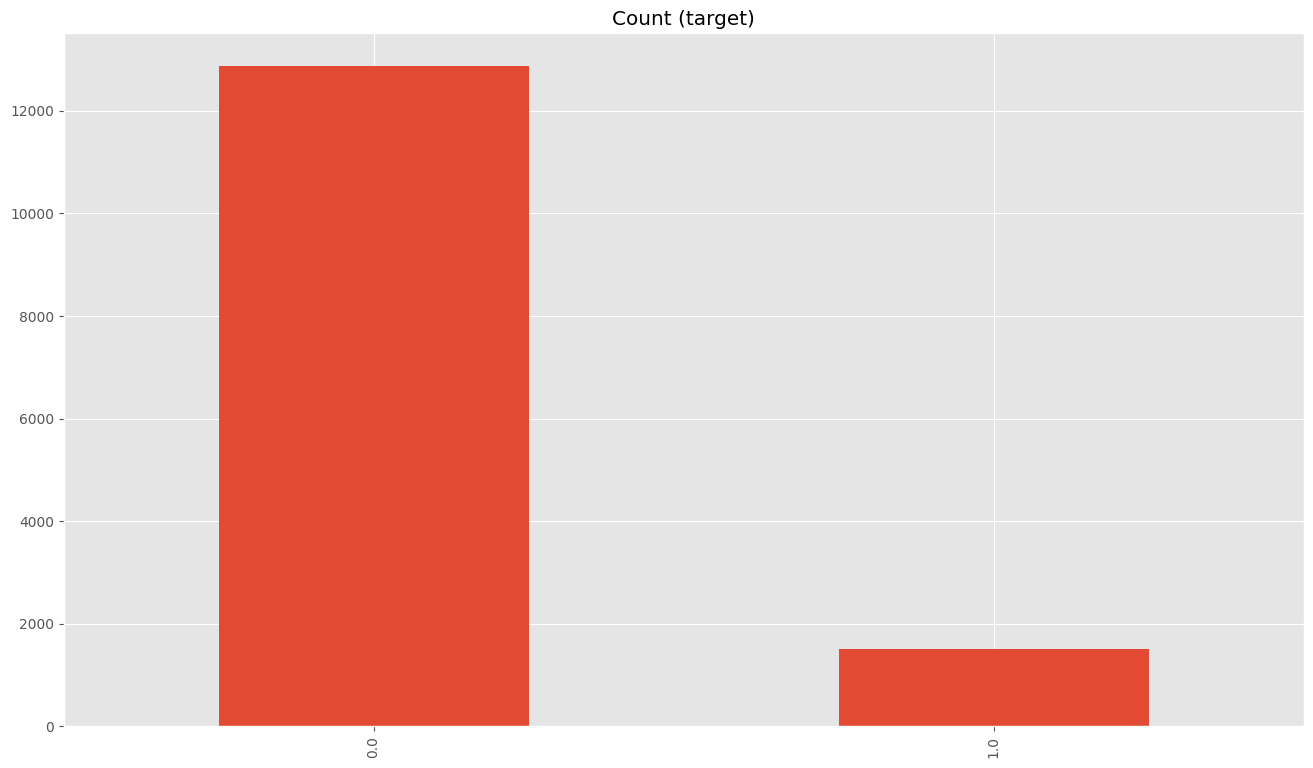

In [ ]:
# Detección del desbalance de la muestras
target_count = data.picos_intens.value_counts()
print('Class 0 Intensidad_Normal:', target_count[0])
print('Class 1 Intensidad_Pico:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

Hace falta hacer el proceso de Entendimiento, Tratamiento y Analisís
para que sea un Proyecto completo


### **4. Separando una muestra para verificar resultado de estrategias de muestreo**

In [ ]:
# Seleccionaremos un 35% de los datos para estudiar el beneficio de las estretgias de muestreo
# Se deben Colocar las variables que realmente tienen participación(+significativas)
#con el target determinadas en el paso previo

X = data[['Presion',  'Tonelaje', 'Velocidad','%Solidos', 'Potencia', 'F80', 'Brazo']]
y = data[['picos_intens']]

import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.35,random_state=42)

### **5. Evaluando la escenarios de modelamiento XGBoost**

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
# Declaramos el primer modelo
# dentro del () van los parametros, sino no se pone nada se mantiene constante
model1 = xgb.XGBClassifier()

In [ ]:
# Declaramos el segundo algortimo
model2 = xgb.XGBClassifier(n_estimators=20 , max_depth=8, learning_rate=0.1 , subsample=0.5)

In [ ]:
# Descargamos otro alg que es el primo hermano del XGboost
!pip install catboost

In [ ]:
import catboost
from catboost import CatBoostClassifier

In [ ]:
# Declaramos el tercer modelo
model3 = CatBoostClassifier()

In [ ]:
# Importamos el Random Forest de la libreria SKLearn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Declaramos el cuarto modelo
model4 = RandomForestClassifier()

In [ ]:
# Declaramos el quinto modelo
model5 = RandomForestClassifier(n_estimators=20, max_depth=8)

In [ ]:
# Declaramos 5 modelos Classifier en total:
# model1: XG Boost sin parametros por default
# model2: XG Boost con parametros
# model3: Catboost sin parametros por default
# model4: Random Forest sin parametros por default
# model5: Random Forest con parametros

Pasamos a entrenar los algoritmos

In [ ]:
# model#.fit() es para entrenar el modelo
model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
model3.fit(X_train, y_train)

Learning rate set to 0.02675
0:	learn: 0.6397679	total: 4.93ms	remaining: 4.93s
1:	learn: 0.5914018	total: 8.92ms	remaining: 4.45s
2:	learn: 0.5445790	total: 13ms	remaining: 4.32s
3:	learn: 0.5037461	total: 17ms	remaining: 4.24s
4:	learn: 0.4641864	total: 21.1ms	remaining: 4.2s
5:	learn: 0.4296169	total: 25.5ms	remaining: 4.22s
6:	learn: 0.4004173	total: 30.9ms	remaining: 4.39s
7:	learn: 0.3755289	total: 35ms	remaining: 4.34s
8:	learn: 0.3506509	total: 39ms	remaining: 4.3s
9:	learn: 0.3296770	total: 43.3ms	remaining: 4.28s
10:	learn: 0.3100769	total: 47.4ms	remaining: 4.26s
11:	learn: 0.2920043	total: 51.8ms	remaining: 4.27s
12:	learn: 0.2767872	total: 56.2ms	remaining: 4.27s
13:	learn: 0.2618043	total: 60.3ms	remaining: 4.25s
14:	learn: 0.2488392	total: 64.6ms	remaining: 4.24s
15:	learn: 0.2384063	total: 69ms	remaining: 4.24s
16:	learn: 0.2264868	total: 73.1ms	remaining: 4.23s
17:	learn: 0.2178713	total: 77.2ms	remaining: 4.21s
18:	learn: 0.2095829	total: 81.7ms	remaining: 4.22s
19:	l

In [ ]:
model4.fit(X_train, y_train)

<ipython-input-66-e1373b20bd5a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
model5.fit(X_train, y_train)

<ipython-input-67-22bcca698d6e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model5.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=20)

In [ ]:
# Agregamos un sexto modelo que es un clasificador de arbol simple
# Para tomarlo como punto de comparación
from sklearn.tree import DecisionTreeClassifier

# Defino el modelo
model6 = DecisionTreeClassifier()
# Entreno el modelo
model6.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# importamos la libreria final
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
# Vamos a predecir un resultado para cada modelo
from sklearn.metrics import classification_report

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)

In [ ]:
pred4

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(pred4)

[1. 0. 0. ... 0. 0. 0.]


Procedemos a hacer la matriz de confusión para cada modelo generado y lo comparamos con el test.
Comparamos lo real frente a lo predicho


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

array([[4476,   44],
       [ 101,  411]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred2)

array([[4483,   37],
       [ 145,  367]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred3)

array([[4486,   34],
       [ 114,  398]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred4)

array([[4489,   31],
       [ 108,  404]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred5)

array([[4501,   19],
       [ 146,  366]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred6)

array([[4432,   88],
       [ 108,  404]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

array([[4476,   44],
       [ 101,  411]])

In [ ]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4520
         1.0       0.90      0.80      0.85       512

    accuracy                           0.97      5032
   macro avg       0.94      0.90      0.92      5032
weighted avg       0.97      0.97      0.97      5032



In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      4520
         1.0       0.91      0.72      0.80       512

    accuracy                           0.96      5032
   macro avg       0.94      0.85      0.89      5032
weighted avg       0.96      0.96      0.96      5032



In [ ]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4520
         1.0       0.92      0.78      0.84       512

    accuracy                           0.97      5032
   macro avg       0.95      0.88      0.91      5032
weighted avg       0.97      0.97      0.97      5032



In [ ]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4520
         1.0       0.93      0.79      0.85       512

    accuracy                           0.97      5032
   macro avg       0.95      0.89      0.92      5032
weighted avg       0.97      0.97      0.97      5032



In [ ]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      4520
         1.0       0.95      0.71      0.82       512

    accuracy                           0.97      5032
   macro avg       0.96      0.86      0.90      5032
weighted avg       0.97      0.97      0.97      5032



In [ ]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4520
         1.0       0.82      0.79      0.80       512

    accuracy                           0.96      5032
   macro avg       0.90      0.88      0.89      5032
weighted avg       0.96      0.96      0.96      5032



In [ ]:
df = pd.DataFrame({'algorithm' : ['XGBoost','XGBoost Tuneado','Catboost','RF','RF Tuneado','Arbol de Decision'],
                   'precision' : [0.90, 0.91, 0.92,0.92,0.96,0.81],
                   'recall' : [0.80, 0.72, 0.78,0.79,0.69,0.79]})

In [ ]:
df

,algorithm,precision,recall
0,XGBoost,0.90,0.80
1,XGBoost Tuneado,0.91,0.72
2,Catboost,0.92,0.78
3,RF,0.92,0.79
4,RF Tuneado,0.96,0.69
5,Arbol de Decision,0.81,0.79


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test, pred3) * 100))
print("Accuracy for model 4: %.2f" % (accuracy_score(y_test, pred4) * 100))
print("Accuracy for model 5: %.2f" % (accuracy_score(y_test, pred5) * 100))
print("Accuracy for model 6: %.2f" % (accuracy_score(y_test, pred6) * 100))

Accuracy for model 1: 97.12
Accuracy for model 2: 96.38
Accuracy for model 3: 97.06
Accuracy for model 4: 97.24
Accuracy for model 5: 96.72
Accuracy for model 6: 96.10


Matriz de Confusión MODELO GANADOR:
 [[4484   36]
 [ 115  397]]
Métricas de Matriz de Confusión - MODELO GANADOR:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      4520
         1.0       0.92      0.78      0.84       512

    accuracy                           0.97      5032
   macro avg       0.95      0.88      0.91      5032
weighted avg       0.97      0.97      0.97      5032



<ipython-input-83-e5330b5590e1>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-83-e5330b5590e1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


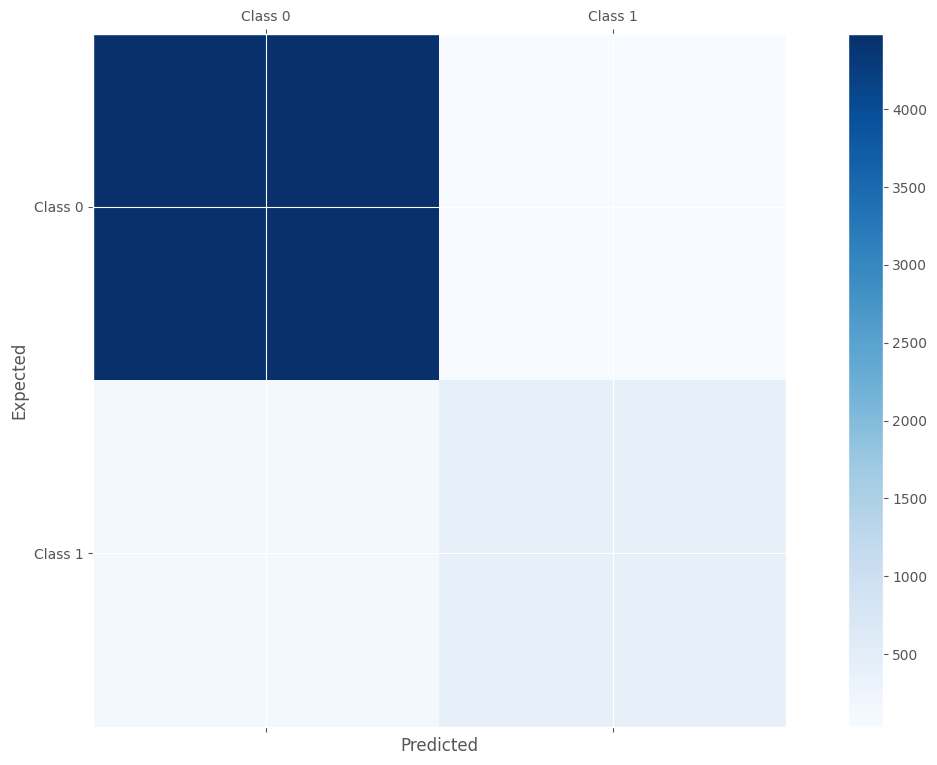

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred4) ##Modificar al modelo
#--------------------------------------------------------------------

print('Matriz de Confusión MODELO GANADOR:\n', conf_mat)

print('Métricas de Matriz de Confusión - MODELO GANADOR:\n',classification_report(y_test,pred4))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

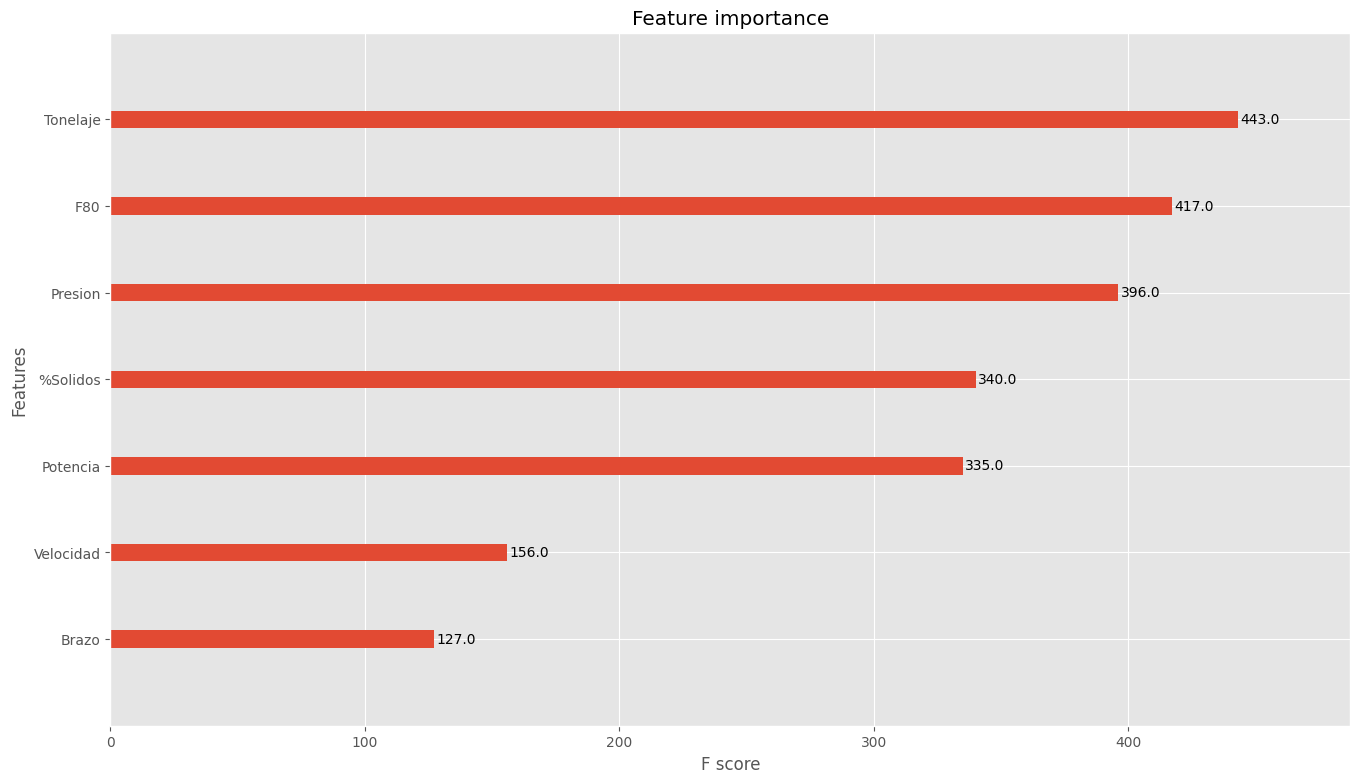

In [ ]:
# Para los modelos con XGBoost se puede sacar un grafico de importancia
# LA PARTICIPACIÓN DE CADA VARIABLE
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model1)
pyplot.show()